# Walid Rahman
### DS Project

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Replace your filepath for your machine here
taxi_filepath = "green_tripdata_2016-09.csv"

In [3]:
# Use pandas to read in data from csv
taxi_df = pd.read_csv(taxi_filepath)

In [4]:
# I add an index column named 'idx'. This is not the actual index, but when I merge this data set with
# another data set, the original indices will get unsorted from their current order. I will use 'idx'
# to resort the dataframe and then set it as the index.
taxi_df['idx'] = range(0, len(taxi_df))
taxi_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,idx
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0,0
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0,1
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0,2
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0,3
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,4


In [5]:
# Just wanted to show the sheer size of the dataset
taxi_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,idx
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0,0
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0,1
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0,2
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0,3
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2,9/28/2016 11:09,9/28/2016 11:17,N,1,74,42,1,1.20,7.0,0.0,0.5,1.95,0.0,NaN,0.3,9.75,1,1.0,1048569
1048570,2,9/28/2016 11:07,9/28/2016 11:20,N,1,33,45,1,2.23,11.0,0.0,0.5,0.00,0.0,NaN,0.3,11.80,1,1.0,1048570
1048571,2,9/28/2016 11:38,9/28/2016 12:06,N,1,33,70,1,11.56,33.5,0.0,0.5,0.00,0.0,NaN,0.3,34.30,2,1.0,1048571
1048572,2,9/28/2016 11:12,9/28/2016 11:21,N,1,196,196,1,2.11,9.5,0.0,0.5,0.00,0.0,NaN,0.3,10.30,2,1.0,1048572


In [6]:
# Shape of dataset - first value is number of rows, second value is number of columns (not counting index)
taxi_df.shape

(1048574, 20)

In [7]:
# We should check the data types of our features. Are lpep_pickup_datetime and lpep_dropoff_datetime really
# datetime objects?
taxi_df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
idx                        int64
dtype: object

In [8]:
# Let us see if our pickup and dropoff times are datetime objects. We can see they are currently just objects,
# and no specification is given as to what kind of object. Generally, you should be able to see with .dtypes
# if the object is a datetime object, but let us verify easily as follows.

print(isinstance(taxi_df.lpep_pickup_datetime[0], datetime.datetime))
print(isinstance(taxi_df.lpep_dropoff_datetime[0], datetime.datetime))

False
False


In [9]:
# They are not truly datetime objects. Let's convert those the pickup and dropoff times into datetimes. 

taxi_df['lpep_pickup_datetime'] =  pd.to_datetime(taxi_df['lpep_pickup_datetime'])
taxi_df['lpep_dropoff_datetime'] =  pd.to_datetime(taxi_df['lpep_dropoff_datetime'])

In [10]:
# We can use the newly converted datetime objects to find a new feature, traveltime
taxi_df['travel_time'] = taxi_df['lpep_dropoff_datetime'] - taxi_df['lpep_pickup_datetime']

In [11]:
# Convert travel time to minutes, since its a more reasonable scale
taxi_df['travel_time'] = taxi_df['travel_time']/np.timedelta64(1,'m')

In [12]:
# Check values of our new feature
taxi_df['travel_time']

0          13.0
1          16.0
2           9.0
3          39.0
4          10.0
           ... 
1048569     8.0
1048570    13.0
1048571    28.0
1048572     9.0
1048573     1.0
Name: travel_time, Length: 1048574, dtype: float64

Before we run any analysis, we need to understand what each field means. Luckily, NYC.gov provides a [data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). Upon examining the dictionary, we can make more sense of RatecodeID, PULocationID, and DOLocationID mean. As per the dictionary:

 - RatecodeID: The final rate code in effect at the end of the trip.

       1 = Standard rate

       2 = JFK

       3 = Newark

       4 = Nassau or Westchester

       5 = Negotiated fare

       6 = Group ride

 - PUlocationID:TLC Taxi Zone in which the taximeter was engaged (picked up)

 - DOLocationID: TLC Taxi Zone in which the taximeter was disengaged (dropped off)
 
 
 We can now utilize the taxi zone lookup csv. It contains the exact meaning of each LocationID. 

In [13]:
# As before, replace with your local machine filepath for this file
zone_filepath = "taxi+_zone_lookup.csv"

# Use pandas to read in data
zone_df = pd.read_csv(zone_filepath)
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [14]:
# Let's merge dataframes based on the PULocationID so we can see what boroughs passengers were picked up in
taxi_df_new = pd.merge(taxi_df, zone_df, left_on='PULocationID', right_on='LocationID')

In [15]:
# Merging changes the indices around, so we can fix that by sorting by our 'idx' column
taxi_df_new =  taxi_df_new.sort_values(by=['idx'])

In [16]:
# Since we will also merge for the dropoff locations, we should rename our new columns
taxi_df_new.rename(columns={'Borough':'PUBorough',
                          'Zone':'PUZone',
                          'service_zone':'PUservice_zone',
                           'LocationID': 'LocationID_PU'}, 
                 inplace=True)

In [17]:
taxi_df_new.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,idx,travel_time,LocationID_PU,PUBorough,PUZone,PUservice_zone
0,2,2016-09-01 00:58:00,2016-09-01 01:11:00,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0,0,13.0,92,Queens,Flushing,Boro Zone
8766,2,2016-09-01 00:49:00,2016-09-01 01:05:00,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0,1,16.0,83,Queens,Elmhurst/Maspeth,Boro Zone
15394,2,2016-09-01 00:06:00,2016-09-01 00:15:00,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0,2,9.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone
15395,2,2016-09-01 00:28:00,2016-09-01 01:07:00,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0,3,39.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone
25591,2,2016-09-01 00:17:00,2016-09-01 00:27:00,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,4,10.0,130,Queens,Jamaica,Boro Zone


In [18]:
# Let's repeat these steps, but for our DOLocationID
taxi_df_new = pd.merge(taxi_df_new, zone_df, left_on='DOLocationID', right_on='LocationID')
taxi_df_new =  taxi_df_new.sort_values(by=['idx'])
taxi_df_new.rename(columns={'Borough':'DOBorough',
                          'Zone':'DOZone',
                          'service_zone':'DOservice_zone',
                           'LocationID': 'LocationID_DO'}, 
                 inplace=True)

In [19]:
taxi_df_new.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,idx,travel_time,LocationID_PU,PUBorough,PUZone,PUservice_zone,LocationID_DO,DOBorough,DOZone,DOservice_zone
0,2,2016-09-01 00:58:00,2016-09-01 01:11:00,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0,0,13.0,92,Queens,Flushing,Boro Zone,82,Queens,Elmhurst,Boro Zone
20944,2,2016-09-01 00:49:00,2016-09-01 01:05:00,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0,1,16.0,83,Queens,Elmhurst/Maspeth,Boro Zone,92,Queens,Flushing,Boro Zone
24927,2,2016-09-01 00:06:00,2016-09-01 00:15:00,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0,2,9.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone,223,Queens,Steinway,Boro Zone
42617,2,2016-09-01 00:28:00,2016-09-01 01:07:00,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0,3,39.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone,265,Unknown,NaN,NaN
45320,2,2016-09-01 00:17:00,2016-09-01 00:27:00,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,4,10.0,130,Queens,Jamaica,Boro Zone,63,Brooklyn,Cypress Hills,Boro Zone


In [20]:
# Now that we have a new dataframe with pickup and dropoff zones included, we can set our index to our
# 'idx' column. It is not necessary in our case, but it is nice to at least correct the indices back to how
# they are were in the original taxi dataset.
taxi_df_new = taxi_df_new.set_index('idx')
taxi_df_new

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,LocationID_PU,PUBorough,PUZone,PUservice_zone,LocationID_DO,DOBorough,DOZone,DOservice_zone
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2016-09-01 00:58:00,2016-09-01 01:11:00,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0,13.0,92,Queens,Flushing,Boro Zone,82,Queens,Elmhurst,Boro Zone
1,2,2016-09-01 00:49:00,2016-09-01 01:05:00,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0,16.0,83,Queens,Elmhurst/Maspeth,Boro Zone,92,Queens,Flushing,Boro Zone
2,2,2016-09-01 00:06:00,2016-09-01 00:15:00,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0,9.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone,223,Queens,Steinway,Boro Zone
3,2,2016-09-01 00:28:00,2016-09-01 01:07:00,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0,39.0,93,Queens,Flushing Meadows-Corona Park,Boro Zone,265,Unknown,NaN,NaN
4,2,2016-09-01 00:17:00,2016-09-01 00:27:00,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,10.0,130,Queens,Jamaica,Boro Zone,63,Brooklyn,Cypress Hills,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2,2016-09-28 11:09:00,2016-09-28 11:17:00,N,1,74,42,1,1.20,7.0,0.0,0.5,1.95,0.0,NaN,0.3,9.75,1,1.0,8.0,74,Manhattan,East Harlem North,Boro Zone,42,Manhattan,Central Harlem North,Boro Zone
1048570,2,2016-09-28 11:07:00,2016-09-28 11:20:00,N,1,33,45,1,2.23,11.0,0.0,0.5,0.00,0.0,NaN,0.3,11.80,1,1.0,13.0,33,Brooklyn,Brooklyn Heights,Boro Zone,45,Manhattan,Chinatown,Yellow Zone
1048571,2,2016-09-28 11:38:00,2016-09-28 12:06:00,N,1,33,70,1,11.56,33.5,0.0,0.5,0.00,0.0,NaN,0.3,34.30,2,1.0,28.0,33,Brooklyn,Brooklyn Heights,Boro Zone,70,Queens,East Elmhurst,Boro Zone


In [21]:
# Many of the columns are redundant. Going forward, let us use the columns that hold the highest relevance.
# Note that this is subjective - I have decided on what columns to use based on my understanding of the data
# dictionary. Before we do that, let us just see what the correlation coefficients are. The absolute
# value of the corrleation coefficients help tell us if features are correlated in some way, i.e. there may be
# some relationship between the features themselves.

taxi_df_new.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,LocationID_PU,LocationID_DO
VendorID,1.000000,-0.005359,0.009881,0.006132,0.073495,0.007280,0.012005,-0.001478,-0.005801,0.003909,0.000587,NaN,0.001320,0.013088,-0.048434,-0.004511,0.042878,0.009881,0.006132
RatecodeID,-0.005359,1.000000,0.051372,0.025671,-0.004341,0.058657,0.140053,-0.128204,-0.814905,0.014320,0.046196,NaN,-0.792548,0.117143,0.028778,0.951514,0.005065,0.051372,0.025671
PULocationID,0.009881,0.051372,1.000000,0.131577,0.019566,0.045246,0.034867,0.024148,-0.048297,0.030517,0.010696,NaN,-0.047052,0.037660,-0.021800,0.051746,0.006230,1.000000,0.131577
DOLocationID,0.006132,0.025671,0.131577,1.000000,0.005930,0.090236,0.080683,-0.019305,-0.016403,0.052745,0.028205,NaN,-0.018628,0.082649,-0.044497,0.020961,0.008949,0.131577,1.000000
passenger_count,0.073495,-0.004341,0.019566,0.005930,1.000000,0.011886,0.014390,0.007084,0.003819,0.006519,0.008765,NaN,0.004212,0.015062,-0.003374,-0.005204,0.006973,0.019566,0.005930
trip_distance,0.007280,0.058657,0.045246,0.090236,0.011886,1.000000,0.805030,-0.011336,-0.011016,0.403541,0.331647,NaN,0.001593,0.816751,-0.135807,0.022260,0.086422,0.045246,0.090236
fare_amount,0.012005,0.140053,0.034867,0.080683,0.014390,0.805030,1.000000,-0.017509,-0.060436,0.376634,0.268185,NaN,-0.043194,0.978805,-0.135930,0.097402,0.085384,0.034867,0.080683
extra,-0.001478,-0.128204,0.024148,-0.019305,0.007084,-0.011336,-0.017509,1.000000,0.156115,0.013910,-0.009278,NaN,0.153700,0.018360,-0.030636,-0.131464,0.002681,0.024148,-0.019305
mta_tax,-0.005801,-0.814905,-0.048297,-0.016403,0.003819,-0.011016,-0.060436,0.156115,1.000000,0.009302,-0.030644,NaN,0.966131,-0.037849,-0.097780,-0.836534,-0.000942,-0.048297,-0.016403
tip_amount,0.003909,0.014320,0.030517,0.052745,0.006519,0.403541,0.376634,0.013910,0.009302,1.000000,0.194794,NaN,0.017196,0.541812,-0.522672,-0.005685,0.021457,0.030517,0.052745


In [22]:
# We can see that many features have poor correlations. We can see that some features have correlations with
# other features (NaN). Some features are redundant (such as LocationID_PU). Let us take care of removing these
# features.

taxi_df_new.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1048574
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      1
travel_time                    0
LocationID_PU                  0
PUBorough                      0
PUZone                       446
PUservice_zone              1937
LocationID_DO                  0
DOBorough                      0
DOZone                      2703
DOservice_zone              4138
dtype: int64

In [23]:
# Before we drop any rows with null values, let us drop the columns with null values as well as columns
#that express redudnat information.
to_drop = ['VendorID','store_and_fwd_flag', 'ehail_fee', 'LocationID_PU', 'LocationID_DO', 'PUZone', 'PUservice_zone',
          'DOZone', 'DOservice_zone']
taxi_df_new = taxi_df_new.drop(to_drop, axis=1)

In [24]:
# Columns remaining
taxi_df_new.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type', 'travel_time', 'PUBorough', 'DOBorough'], dtype='object')

In [25]:
# Now, lets see how many rows we have that have null values
taxi_df_new.isnull().sum().sum()

1

In [26]:
# 1 null row is really good. Let us drop that one row.
taxi_df_new.dropna()
taxi_df_new.shape

(1048574, 19)

In [27]:
# Before we move forward, we need to address a very important strangeness in the dataset. Many of the 
# trip distance are actually 0. 

dist_zeros = taxi_df_new[taxi_df_new['trip_distance'] == 0]
len(dist_zeros)

14770

In [28]:
# As we can see, 14,770 rows of our dataset reports trip distance of 0. A trip distance of 0 is no trip at all.
# This may have been a reporting error. Regardless, we will get rid of these rows
taxi_df_new =taxi_df_new[taxi_df_new['trip_distance'] > 0]
len(taxi_df_new)

1033804

In [29]:
# There are also some fare amounts that don't make sense

fare_zeros = taxi_df_new[taxi_df_new['fare_amount'] == 0]
len(fare_zeros)

2065

In [30]:
# Out of these 2065 fare_amounts of 0s, it would be interesting to see what the travel times and distances were
fare_zeros[['trip_distance', 'fare_amount', 'travel_time']]

,trip_distance,fare_amount,travel_time
idx,,,
1202,0.1,0.0,1.0
2473,0.4,0.0,3.0
2477,0.3,0.0,1.0
3195,8.9,0.0,23.0
3211,2.9,0.0,13.0
...,...,...,...
1047286,1.9,0.0,12.0
1047441,3.1,0.0,37.0
1047466,1.3,0.0,9.0


There could be a variety of reasons why fare amounts for some cases are 0. It could be because the driver forgot to turn the meter on, so it wasn't recorded. For now, I won't do anything to these rows. However, when making some models, I will remove these rows. 

In [31]:
# Now, let's look at our dataframe again so we can refer to it when looking at following code
taxi_df_new.head(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,PUBorough,DOBorough
idx,,,,,,,,,,,,,,,,,,,
0,2016-09-01 00:58:00,2016-09-01 01:11:00,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,0.3,14.80,1,1.0,13.0,Queens,Queens
1,2016-09-01 00:49:00,2016-09-01 01:05:00,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,0.3,15.80,2,1.0,16.0,Queens,Queens
2,2016-09-01 00:06:00,2016-09-01 00:15:00,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2,1.0,9.0,Queens,Queens
3,2016-09-01 00:28:00,2016-09-01 01:07:00,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,0.3,150.38,1,1.0,39.0,Queens,Unknown
4,2016-09-01 00:17:00,2016-09-01 00:27:00,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,0.3,15.96,1,1.0,10.0,Queens,Brooklyn
5,2016-09-01 00:45:00,2016-09-01 01:00:00,1,244,20,1,4.53,16.0,0.5,0.5,0.00,0.0,0.3,17.30,1,1.0,15.0,Manhattan,Bronx
6,2016-09-01 00:59:00,2016-09-01 01:03:00,1,223,223,1,0.67,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2,1.0,4.0,Queens,Queens
7,2016-09-01 00:24:00,2016-09-01 00:28:00,1,260,83,5,0.82,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2,1.0,4.0,Queens,Queens
8,2016-09-01 00:32:00,2016-09-01 00:53:00,1,95,197,1,4.87,17.5,0.5,0.5,0.00,0.0,0.3,18.80,2,1.0,21.0,Queens,Queens


In [32]:
# Let's create a new column which will indicate from which borough to which borough an car traveled
taxi_df_new['borough_cross'] = taxi_df_new['PUBorough'] + '-' + taxi_df_new['DOBorough']

In [33]:
# Let's see which borough to borough trip was most common to least common
num_borough_cross = taxi_df_new.borough_cross.value_counts()
num_borough_cross

Brooklyn-Brooklyn              285997
Manhattan-Manhattan            283897
Queens-Queens                  256981
Brooklyn-Manhattan              58539
Bronx-Bronx                     32918
Manhattan-Bronx                 27494
Queens-Manhattan                24383
Brooklyn-Queens                 20369
Queens-Brooklyn                 13351
Bronx-Manhattan                 11378
Manhattan-Queens                 8739
Manhattan-Brooklyn               2108
Queens-Bronx                     1426
Queens-Unknown                   1046
Bronx-Queens                      897
Manhattan-Unknown                 730
Brooklyn-Bronx                    565
Bronx-Unknown                     543
Brooklyn-Unknown                  408
Unknown-Unknown                   336
Bronx-Brooklyn                    286
Brooklyn-Staten Island            199
Brooklyn-EWR                      181
Unknown-Manhattan                 180
Manhattan-EWR                     167
Unknown-Queens                    158
Staten Islan

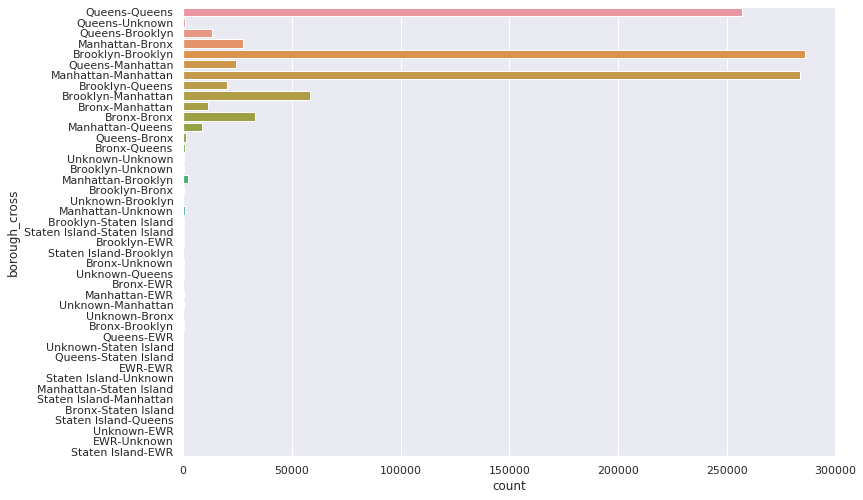

In [34]:
# We can plot the borough to borough movement using seaborn
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(y="borough_cross", data=taxi_df_new)

It is unclear what 'Unknown' refers to here. We will keep it in just so we can capture all recorded trips. We can see that most of the trips were within boroughs, i.e, the car stayed in the same borough during travel.

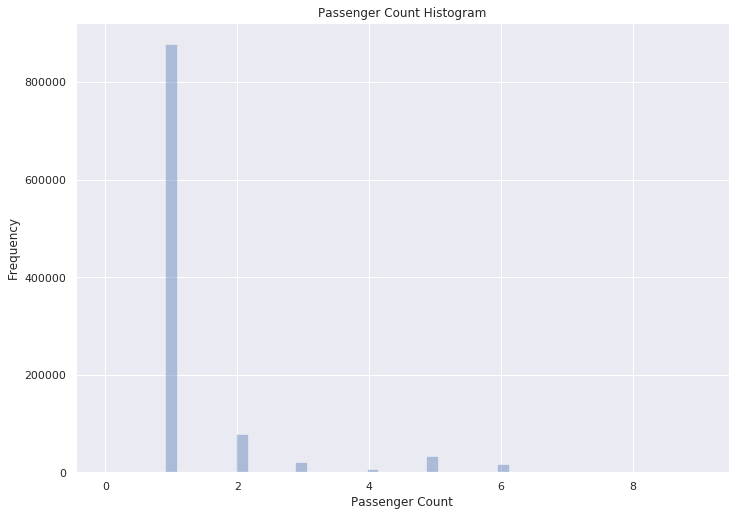

In [35]:
# Now let us see distributions of other features

ax_passenger_count = sns.distplot(taxi_df_new.passenger_count, kde=False, rug=False);
ax_passenger_count.set_title('Passenger Count Histogram');
ax_passenger_count.set_ylabel('Frequency');
ax_passenger_count.set_xlabel('Passenger Count');

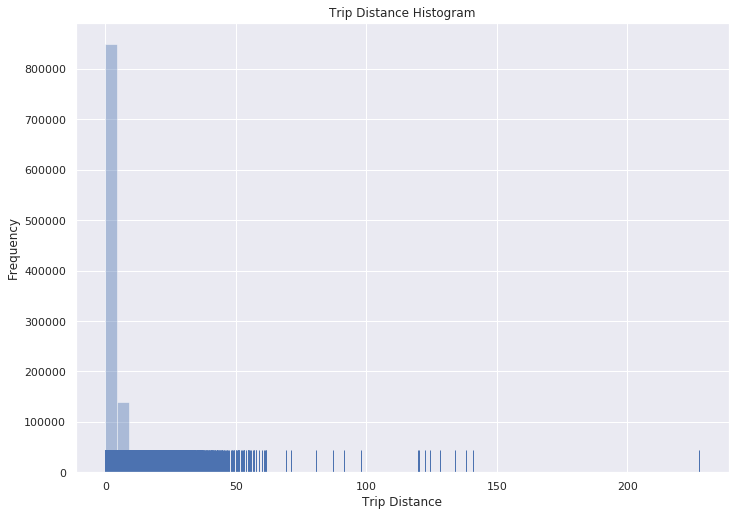

In [36]:
ax_trip_distance = sns.distplot(taxi_df_new.trip_distance, kde=False, rug=True);
ax_trip_distance.set_title('Trip Distance Histogram');
ax_trip_distance.set_ylabel('Frequency');
ax_trip_distance.set_xlabel('Trip Distance');

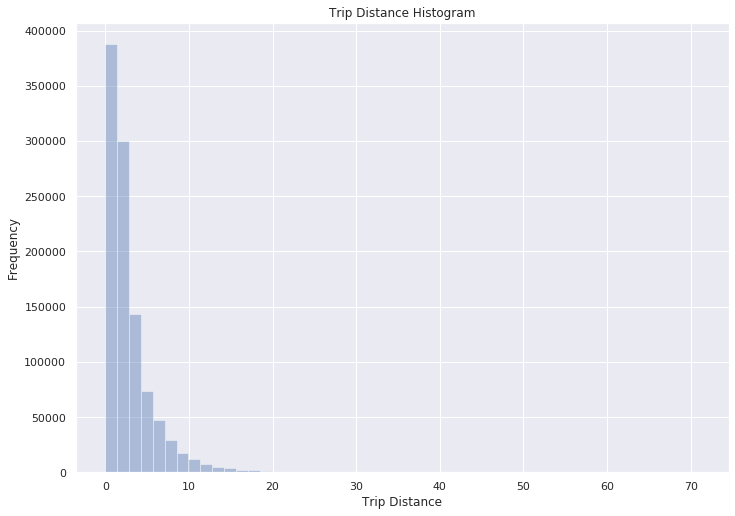

In [37]:
# Let us focus on trip distances less than 75 miles
ax_trip_distance = sns.distplot(taxi_df_new[taxi_df_new['trip_distance'] < 75].trip_distance, kde=False, rug=False);
ax_trip_distance.set_title('Trip Distance Histogram');
ax_trip_distance.set_ylabel('Frequency');
ax_trip_distance.set_xlabel('Trip Distance');

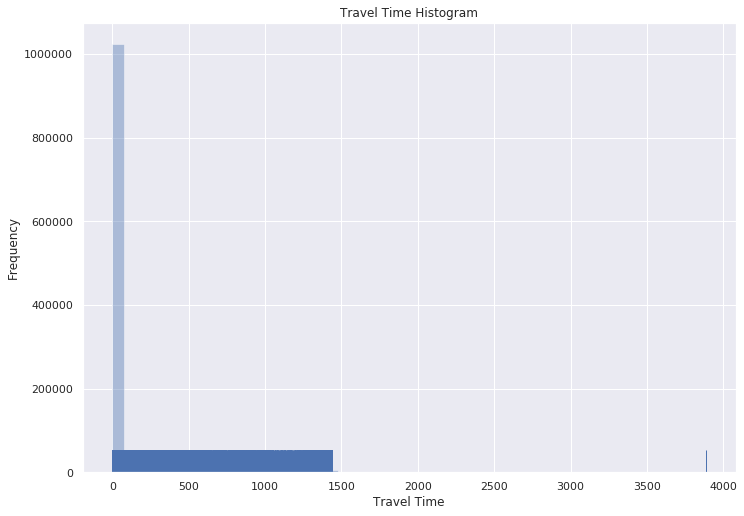

In [38]:
# Travel time histogram
ax_travel_time = sns.distplot(taxi_df_new.travel_time, kde=False, rug=True);
ax_travel_time.set_title('Travel Time Histogram');
ax_travel_time.set_ylabel('Frequency');
ax_travel_time.set_xlabel('Travel Time');

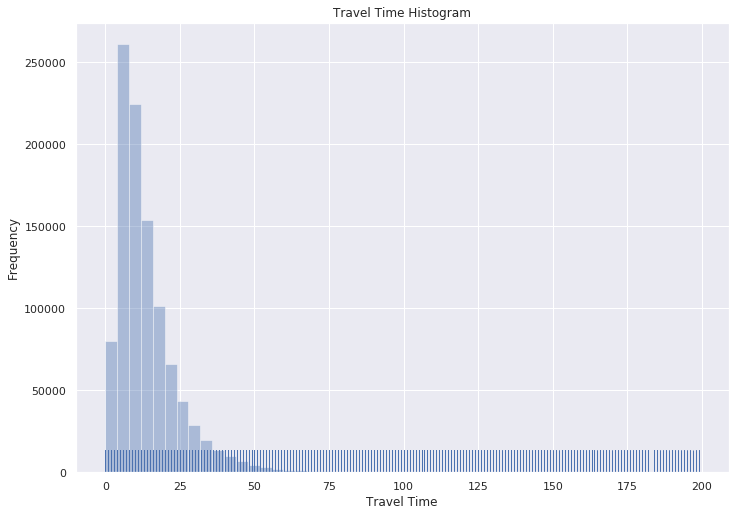

In [39]:
# It isn't helpful to see one bar on the graph. So let us replot within a small subsection from 0 to 1500 Travel time
ax_travel_time = sns.distplot(taxi_df_new[taxi_df_new['travel_time']<200].travel_time, kde=False, rug=True);
ax_travel_time.set_title('Travel Time Histogram');
ax_travel_time.set_ylabel('Frequency');
ax_travel_time.set_xlabel('Travel Time');

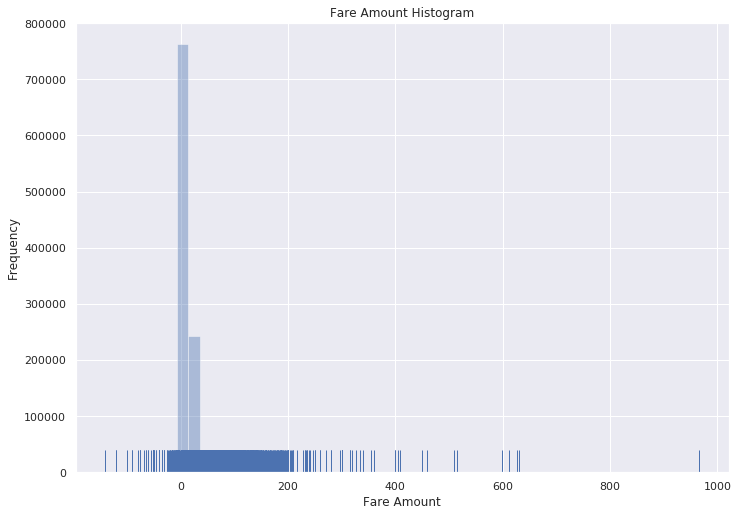

In [40]:
# Now lets see the fare amount histogram
ax_fare_amount = sns.distplot(taxi_df_new.fare_amount, kde=False, rug=True);
ax_fare_amount.set_title('Fare Amount Histogram');
ax_fare_amount.set_ylabel('Frequency');
ax_fare_amount.set_xlabel('Fare Amount');

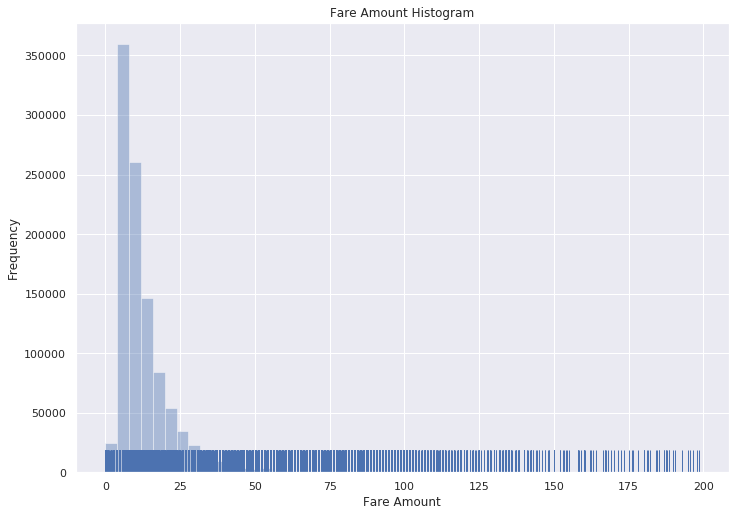

In [41]:
# That histogram isn't very helpful. Let us subset for certain values
ax_fare_amount = sns.distplot(taxi_df_new[(taxi_df_new['fare_amount']<200) & (taxi_df_new['fare_amount']>=0)].fare_amount, kde=False, rug=True);
ax_fare_amount.set_title('Fare Amount Histogram');
ax_fare_amount.set_ylabel('Frequency');
ax_fare_amount.set_xlabel('Fare Amount');

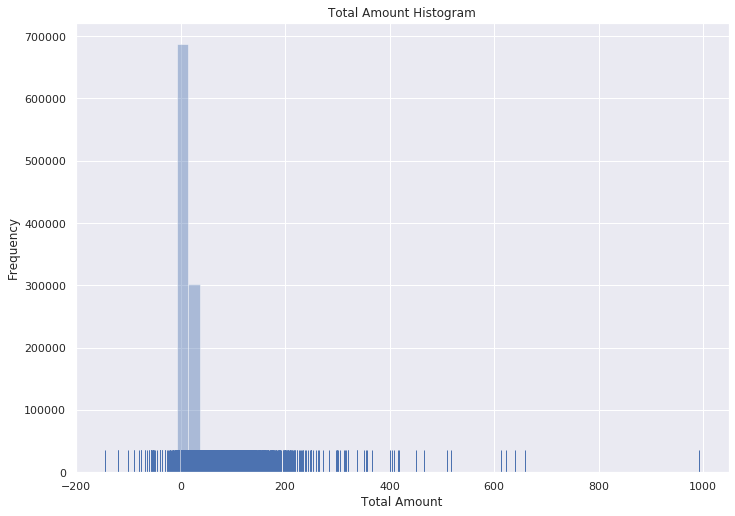

In [42]:
# Histogram for total amount
ax_total_amount = sns.distplot(taxi_df_new.total_amount, kde=False, rug=True);
ax_total_amount.set_title('Total Amount Histogram');
ax_total_amount.set_ylabel('Frequency');
ax_total_amount.set_xlabel('Total Amount');

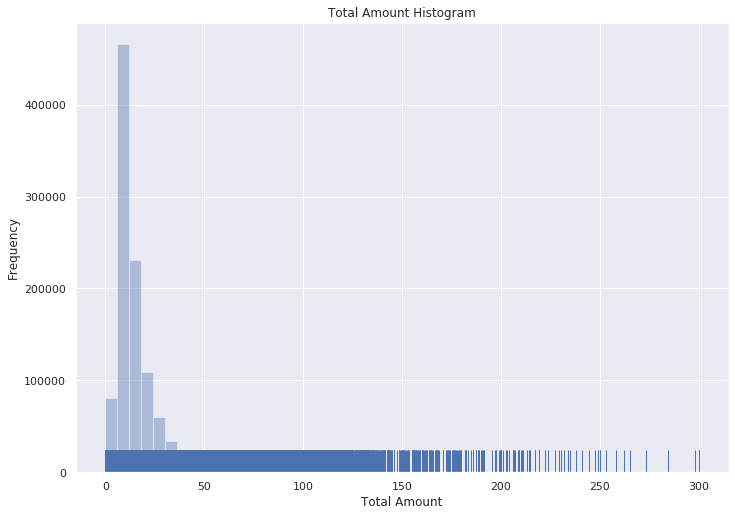

In [43]:
# Again, lets subset the data to get a more useful histogram
ax_total_amount = sns.distplot((taxi_df_new[(taxi_df_new['total_amount']>=0) & (taxi_df_new['total_amount']<=300)]).total_amount, kde=False, rug=True);
ax_total_amount.set_title('Total Amount Histogram');
ax_total_amount.set_ylabel('Frequency');
ax_total_amount.set_xlabel('Total Amount');

We can clearly see that some of these fare amounts are incredibly large. Before we move forward, let us see exactly how much these particularly large fare amounts make sense.

Note that the reason why our histogram of a subset of the datapoints has some fares as 0 is because I didn't remove those rows that have fare_amount == 0 (yet). 

### Outliers!

When examining many of our histograms, we see that some features have tremendously large values at the far ends of their histograms. I am not talking about 0s (which are their own unique problem), but about values that extend far beyond other points in the positive direction, i.e. in fare_amount. 

There are many ways to deal with outliers. Outliers aren't necessarily an indicator of poor data. They may be actual values that may be important to capture in models. Whether or not one should keep outliers in their dataset largely depends on what they are trying to accomplish. Is it important to ask if we can expect such outliers to appear often in the future data. I will make a judgement call here, and one based on the knowledge I attained from an actual cab driver. I will later subset our data to remove extreme outliers. However, before deciding how much our data set to keep and how much to remove, I will use data percentiles. These percentiles are similar to what you would see on a box and whisker plot. 

First, let us look at one of the features, fare_amount, and see how the 75th percentile value changes as we subset for higher and higher values of fare_amount. This way, we can see up to what point does our data stop seeming reasonable, if at all. Perhaps the data is reasonable.


In [44]:
# Subset for higher than 100
temp_fare_df = taxi_df_new[taxi_df_new['fare_amount'] >100]

In [45]:
temp_fare_df.describe().fare_amount

count    440.000000
mean     153.304000
std       85.812997
min      100.030000
25%      110.500000
50%      128.000000
75%      153.625000
max      965.500000
Name: fare_amount, dtype: float64

We can see that some of the fair amounts (the max) lie far outside the 75% of the data. Let us see how many rows there are that have fare amounts greather than the 75%.

In [46]:
temp_fare_df[temp_fare_df['fare_amount'] >165.0].describe().fare_amount

count     93.000000
mean     266.288172
std      132.892962
min      166.500000
25%      185.000000
50%      208.500000
75%      300.000000
max      965.500000
Name: fare_amount, dtype: float64

In [47]:
temp_fare_df[temp_fare_df['fare_amount'] >300.0].describe().fare_amount

count     21.000000
mean     459.323810
std      158.579135
min      315.000000
25%      339.000000
50%      405.500000
75%      515.500000
max      965.500000
Name: fare_amount, dtype: float64

In [48]:
temp_fare_df[temp_fare_df['fare_amount'] >594.0].describe()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time
count,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.000000,5.0,5.0,5.000000
mean,4.0,164.800000,209.400000,1.0,148.436000,686.400000,0.100000,0.5,0.0,15.848000,0.3,704.708000,2.0,1.0,199.000000
std,0.0,85.948822,97.881561,0.0,45.076063,156.504553,0.223607,0.0,0.0,9.847127,0.0,161.434054,0.0,0.0,69.336138
min,4.0,39.000000,39.000000,1.0,119.770000,599.000000,0.000000,0.5,0.0,0.000000,0.3,612.300000,2.0,1.0,140.000000
25%,4.0,130.000000,213.000000,1.0,120.260000,611.500000,0.000000,0.5,0.0,12.500000,0.3,621.880000,2.0,1.0,163.000000
50%,4.0,177.000000,265.000000,1.0,133.850000,626.000000,0.000000,0.5,0.0,21.580000,0.3,639.300000,2.0,1.0,176.000000
75%,4.0,213.000000,265.000000,1.0,140.860000,630.000000,0.000000,0.5,0.0,21.580000,0.3,658.280000,2.0,1.0,199.000000
max,4.0,265.000000,265.000000,1.0,227.440000,965.500000,0.500000,0.5,0.0,23.580000,0.3,991.780000,2.0,1.0,317.000000


Looking at the statistics summary table above, we can see that as the trip distance and travel time increases, so does fare amount. This suggests that these fare amounts may in fact be legitimate amounts. For that reason, I will keep these datapoints in.

## Day and Hour Based Analysis

Now, lets run hour-based and day-based analysis. We will use the mean of each feature's values per each hour and per each day in our data set. Before we do that, we need to take care of the total amounts, fares, travel times, and trip distances that are below 0 (since we don't want to add that to the rest of values when evaluating means).

In [49]:
# Accept only values higher than 0
taxi_df_new = taxi_df_new[taxi_df_new['fare_amount'] > 0]
taxi_df_new = taxi_df_new[taxi_df_new['total_amount'] > 0]
taxi_df_new = taxi_df_new[taxi_df_new['trip_distance'] > 0]
taxi_df_new = taxi_df_new[taxi_df_new['travel_time'] > 0]

In [50]:
# It will also be interesting to look at trip statistics grouped by hour and by day.
# First, lets create a pick up hour and drop off hour column in our dataset

taxi_df_new['PUHour'] = taxi_df_new.lpep_pickup_datetime.dt.hour
taxi_df_new['PUDay'] = taxi_df_new.lpep_pickup_datetime.dt.dayofweek
taxi_df_new['DOHour'] = taxi_df_new.lpep_dropoff_datetime.dt.hour
taxi_df_new['DODay'] = taxi_df_new.lpep_dropoff_datetime.dt.dayofweek

taxi_df_new[['PUHour', 'DOHour','PUDay', 'DODay','trip_distance', 'fare_amount', 'total_amount', 'travel_time']].corr()

,PUHour,DOHour,PUDay,DODay,trip_distance,fare_amount,total_amount,travel_time
PUHour,1.000000,0.932958,-0.075765,-0.072249,-0.032809,-0.012832,-0.002628,-0.006953
DOHour,0.932958,1.000000,-0.082415,-0.082359,-0.040034,-0.015393,-0.005918,-0.021683
PUDay,-0.075765,-0.082415,1.000000,0.986120,0.029528,0.014492,0.008337,0.008262
DODay,-0.072249,-0.082359,0.986120,1.000000,0.029271,0.014629,0.008711,-0.003980
trip_distance,-0.032809,-0.040034,0.029528,0.029271,1.000000,0.929326,0.917642,0.085717
fare_amount,-0.012832,-0.015393,0.014492,0.014629,0.929326,1.000000,0.977863,0.097073
total_amount,-0.002628,-0.005918,0.008337,0.008711,0.917642,0.977863,1.000000,0.090265
travel_time,-0.006953,-0.021683,0.008262,-0.003980,0.085717,0.097073,0.090265,1.000000


In [51]:
# We will focus on pick up hour and day since these can help show us plots for each day and hour.
# Note that we use the mean
PUHour_df = taxi_df_new.groupby(['PUHour']).mean()
PUDay_df = taxi_df_new.groupby(['PUDay']).mean()

### Pickup Day

In [52]:
# Let's provide some meaning to the days of the week which are currently to 0 to 6. 
PUDay_df = PUDay_df.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday',
                      6: 'Sunday'})
PUDay_df

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,PUHour,DOHour,DODay
PUDay,,,,,,,,,,,,,,,,,,
Monday,1.060628,114.379330,131.202735,1.327890,2.915674,12.289288,0.359097,0.492669,1.188612,0.132211,0.295745,14.809295,1.528503,1.013803,21.694411,13.393621,13.438004,0.013222
Tuesday,1.061743,112.292326,131.091116,1.327449,2.783636,12.244336,0.414607,0.492359,1.198405,0.124212,0.295526,14.816326,1.519331,1.014553,21.954630,14.235117,14.261313,1.014224
Wednesday,1.062590,111.983982,130.571235,1.325421,2.775563,12.318687,0.400441,0.492399,1.237347,0.121788,0.295463,14.912482,1.511010,1.014598,21.773543,13.696775,13.725156,2.014108
Thursday,1.058733,112.948185,129.610487,1.338514,2.830735,12.436676,0.423298,0.492837,1.241947,0.129214,0.295708,15.060629,1.514058,1.013730,22.137612,14.282150,14.254617,3.016614
Friday,1.058393,113.858660,128.609155,1.338755,2.821600,12.435407,0.448633,0.492971,1.216985,0.126640,0.295813,15.056774,1.523309,1.013323,23.071533,14.575849,14.436430,4.021992
Saturday,1.050372,117.199380,129.013071,1.367008,3.039743,12.685179,0.240801,0.493931,1.234761,0.110434,0.296346,15.101173,1.518045,1.011585,24.117524,13.166937,12.978615,5.024599
Sunday,1.046386,117.776100,129.482776,1.369169,3.118042,12.601331,0.246268,0.494453,1.227933,0.116629,0.296714,15.023145,1.520220,1.010478,24.009659,11.594821,11.591743,5.900349


#### Why Barplots?

It is important that I provide reasoning as to why I am displaying barplots and not line plots. It is true that we can use lineplots. In fact, lineplots will show us changes over time in a nice way. The lines will show how the values for our features change over time. However, they will also imply that the features are continuous over time. Our features aren't continuous over time. Remember that each data point is an inidividual cab trip and each cab's start and end point is in it's OWN row. Thus, even though we have a progression of days and hours, they aren't one after another. Thus, a lineplot would give a false impression of continuity. Thus, we will use barplots. Each barplot will show hour or day on the x axis and will have bars rising to the mean value of the associated feature for each hour or day. 

#### Average Fare per Pick up Day

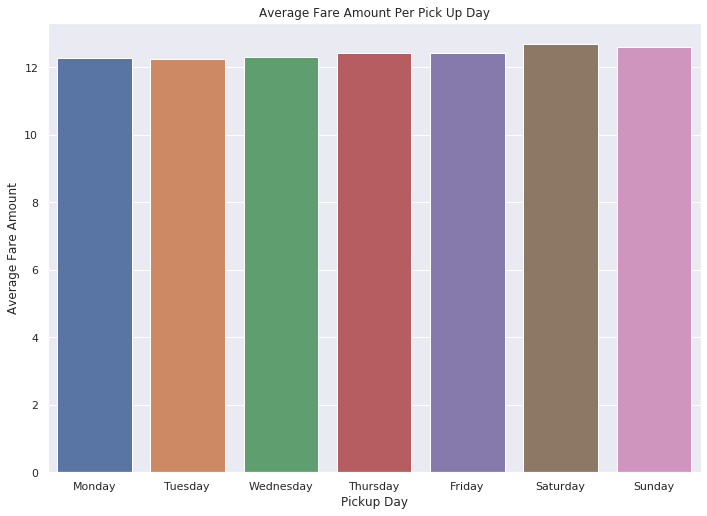

In [53]:
ax_fare_amount_puday = sns.barplot(x=PUDay_df.index, y="fare_amount", data=PUDay_df);
ax_fare_amount_puday.set_title("Average Fare Amount Per Pick Up Day");
ax_fare_amount_puday.set_xlabel("Pickup Day");
ax_fare_amount_puday.set_ylabel("Average Fare Amount");

#### Average Total Amount Earned per Pick-Up Day

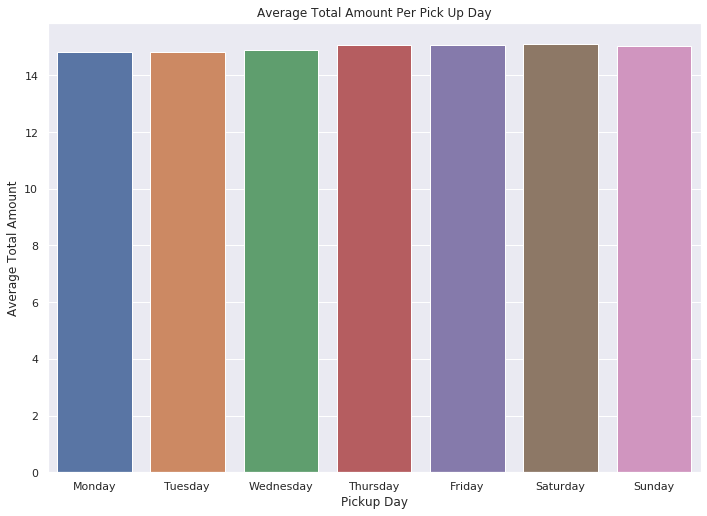

In [54]:
ax_total_amount_puday = sns.barplot(x=PUDay_df.index, y="total_amount", data=PUDay_df);
ax_total_amount_puday.set_title("Average Total Amount Per Pick Up Day");
ax_total_amount_puday.set_xlabel("Pickup Day");
ax_total_amount_puday.set_ylabel("Average Total Amount");

#### Average Trip Distance Traveled per Pick-Up Day

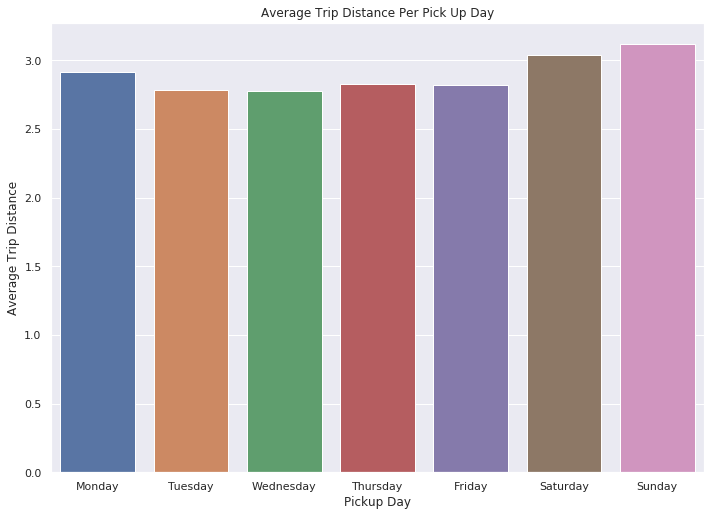

In [55]:
ax_trip_distance_puday = sns.barplot(x=PUDay_df.index, y="trip_distance", data=PUDay_df);
ax_trip_distance_puday.set_title("Average Trip Distance Per Pick Up Day");
ax_trip_distance_puday.set_xlabel("Pickup Day");
ax_trip_distance_puday.set_ylabel("Average Trip Distance");

#### Average Travel Time per Pick-Up Day

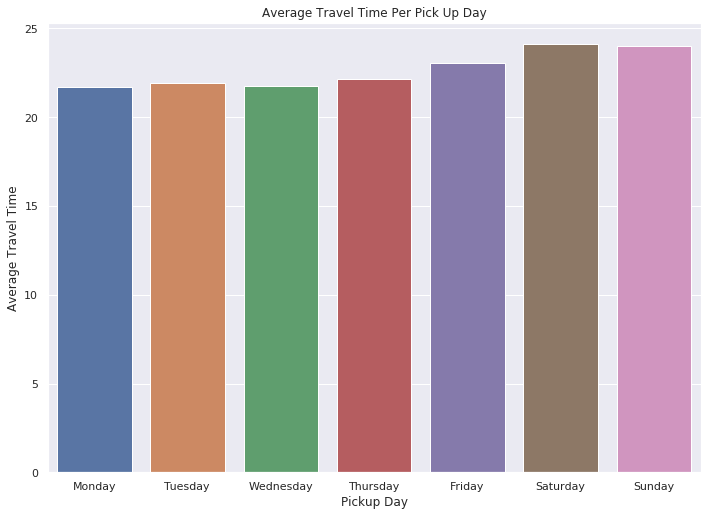

In [56]:
ax_travel_time_puday = sns.barplot(x=PUDay_df.index, y="travel_time", data=PUDay_df);
ax_travel_time_puday.set_title("Average Travel Time Per Pick Up Day");
ax_travel_time_puday.set_xlabel("Pickup Day");
ax_travel_time_puday.set_ylabel("Average Travel Time");

### Pickup Hour

Here, we can see the mean of many values by pick up hour.

In [57]:
PUHour_df

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,PUDay,DOHour,DODay
PUHour,,,,,,,,,,,,,,,,,,
0,1.039867,125.014629,127.119031,1.365989,3.139396,12.342158,0.495914,0.495212,1.277612,0.097908,0.297054,15.038177,1.498946,1.009379,25.367109,3.862035,0.252779,3.855907
1,1.035471,130.003172,125.528369,1.370046,3.006894,11.868823,0.496263,0.495835,1.201323,0.076556,0.297418,14.465890,1.512122,1.008164,26.044794,4.118990,1.174652,4.101724
2,1.036895,133.639787,125.203817,1.393539,3.096259,12.031415,0.496394,0.495538,1.187135,0.056256,0.297367,14.589368,1.522254,1.008450,25.863709,4.299097,2.163134,4.280631
3,1.048866,137.450163,125.381742,1.424925,3.253535,12.414716,0.494460,0.494247,1.163387,0.084408,0.296648,14.970871,1.536626,1.010749,24.895544,4.395710,3.176666,4.380321
4,1.074875,133.893036,127.506377,1.413694,3.548450,13.165891,0.490861,0.491801,1.091470,0.149084,0.295081,15.720120,1.584308,1.015574,26.300206,4.192418,4.144813,4.173964
5,1.121702,125.395234,134.859491,1.350954,4.194221,14.788445,0.468091,0.486533,1.412114,0.267428,0.292221,17.782691,1.541587,1.025290,24.804072,3.649046,5.178216,3.634986
6,1.121232,112.305085,137.084746,1.305214,3.967610,14.456387,0.016917,0.486350,1.496377,0.303878,0.292295,17.151123,1.472118,1.025165,21.808578,3.008539,6.234636,3.007051
7,1.102106,109.556852,134.508664,1.309573,3.103946,13.053456,0.005714,0.488063,1.287712,0.203380,0.292899,15.412860,1.476924,1.022856,23.306250,2.645664,7.259487,2.649327
8,1.090981,107.902427,134.259135,1.305901,2.891609,12.989287,0.004679,0.488970,1.381877,0.161497,0.293563,15.392760,1.449975,1.021146,22.329813,2.616132,8.242512,2.619139


#### Average Fare Amount per Pick-Up Hour 

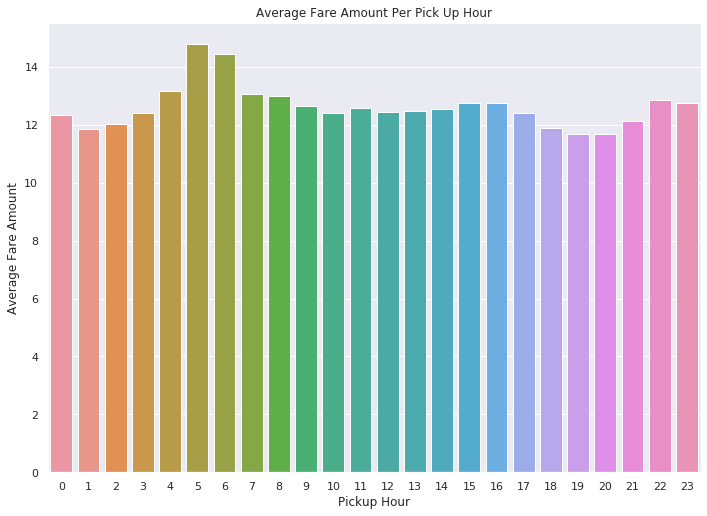

In [58]:
ax_fare_amount_pu = sns.barplot(x=PUHour_df.index, y="fare_amount", data=PUHour_df);
ax_fare_amount_pu.set_title("Average Fare Amount Per Pick Up Hour");
ax_fare_amount_pu.set_xlabel("Pickup Hour");
ax_fare_amount_pu.set_ylabel("Average Fare Amount");

#### Average Total Amount Earned per Pick-Up Hour

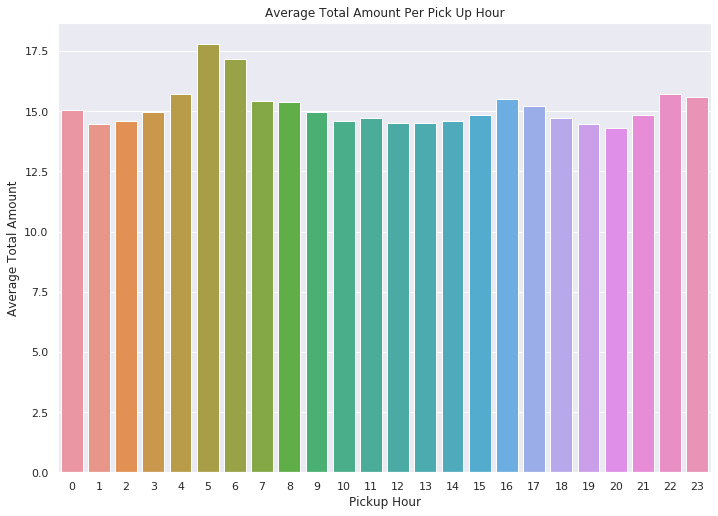

In [59]:
ax_total_amount_pu = sns.barplot(x=PUHour_df.index, y="total_amount", data=PUHour_df);
ax_total_amount_pu.set_title("Average Total Amount Per Pick Up Hour");
ax_total_amount_pu.set_xlabel("Pickup Hour");
ax_total_amount_pu.set_ylabel("Average Total Amount");

#### Average Trip Distance Traveled per Pick-Up Hour

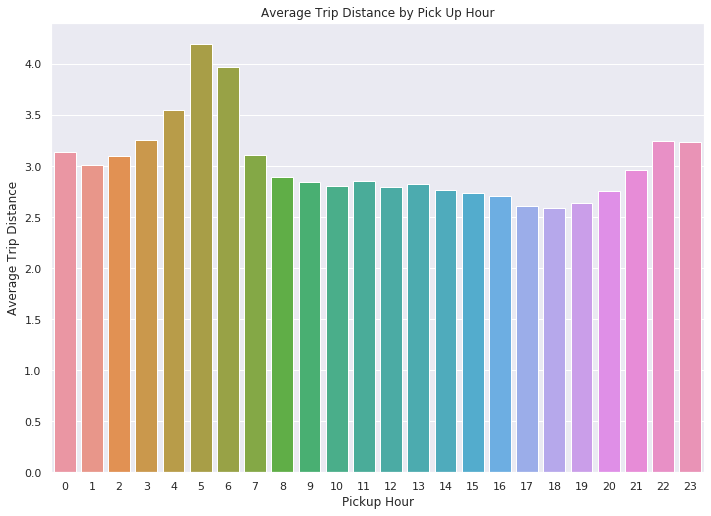

In [60]:
ax_trip_distance_pu = sns.barplot(x=PUHour_df.index, y="trip_distance", data=PUHour_df);
ax_trip_distance_pu.set_title("Average Trip Distance by Pick Up Hour");
ax_trip_distance_pu.set_xlabel("Pickup Hour");
ax_trip_distance_pu.set_ylabel("Average Trip Distance");

#### Average Travel Time per Pick-Up Hour

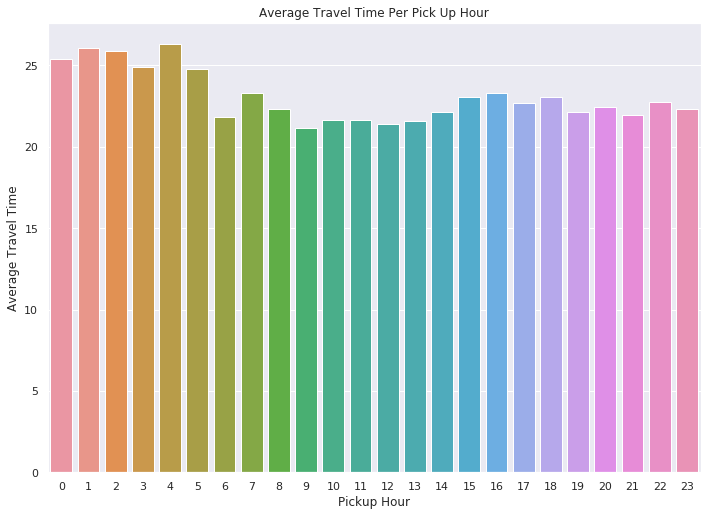

In [61]:
ax_travel_time_pu = sns.barplot(x=PUHour_df.index, y="travel_time", data=PUHour_df);
ax_travel_time_pu.set_title("Average Travel Time Per Pick Up Hour");
ax_travel_time_pu.set_xlabel("Pickup Hour");
ax_travel_time_pu.set_ylabel("Average Travel Time");

What would be interesting to see is if these graphs will change if we remove outliers in total_amount and trip_distance.

### Repeat After Removing Outliers/Extreme Values

Now, we will remove extreme values or outliers from our dataset. We will use the percentiles to determine which values to to keep and which to remove.

In [62]:
# Lets take a look at our outliers. We can specify multiple percentiles to check.
taxi_df_new[['trip_distance', 'fare_amount', 'total_amount', 'travel_time']].describe(percentiles = [.25, .50, 
                                                                                                    .75, .85, .90, 
                                                                                                     .95, .98,
                                                                                                     .99])

,trip_distance,fare_amount,total_amount,travel_time
count,1.025812e+06,1.025812e+06,1.025812e+06,1.025812e+06
mean,2.909880e+00,1.245365e+01,1.498581e+01,2.283052e+01
std,2.997741e+00,9.660769e+00,1.118992e+01,1.102982e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e+00
25%,1.090000e+00,6.500000e+00,8.190000e+00,6.000000e+00
50%,1.900000e+00,9.500000e+00,1.160000e+01,1.100000e+01
75%,3.600000e+00,1.500000e+01,1.780000e+01,1.800000e+01
85%,5.100000e+00,2.000000e+01,2.330000e+01,2.300000e+01
90%,6.400000e+00,2.350000e+01,2.780000e+01,2.800000e+01
95%,8.650000e+00,3.050000e+01,3.580000e+01,3.600000e+01


In [63]:
# We will subset with values lower than the 90%
taxi_df_fil = taxi_df_new[taxi_df_new['trip_distance'] <= 6.400000e+00]
taxi_df_fil = taxi_df_new[taxi_df_new['fare_amount'] <= 2.350000e+01]
taxi_df_fil = taxi_df_new[taxi_df_new['total_amount'] <= 2.788000e+01]
taxi_df_fil = taxi_df_new[taxi_df_new['travel_time'] <= 2.800000e+01]

# Remake per hour and per day dataframes
PUHour_df_fil = taxi_df_fil.groupby(['PUHour']).mean()
PUDay_df_fil = taxi_df_fil.groupby(['PUDay']).mean()
PUDay_df_fil = PUDay_df_fil.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday',
                      6: 'Sunday'})
print(f'Deleted {len(taxi_df_new) - len(taxi_df_fil)} data points')
print(f'{len(taxi_df_fil)} data points remaining')
print(f'{(len(taxi_df_fil)/len(taxi_df))*100}% of the original dataset remains')

Deleted 95328 data points
930484 data points remaining
88.73803851707176% of the original dataset remains


In [64]:
# Look at statistics now.
taxi_df_fil[['trip_distance', 'fare_amount', 'total_amount', 'travel_time']].describe(percentiles = [.25, .50, 
                                                                                                    .75, .85, .90, 
                                                                                                     .95, .98,
                                                                                                     .99])

,trip_distance,fare_amount,total_amount,travel_time
count,930484.000000,930484.000000,930484.000000,930484.000000
mean,2.376391,10.530004,12.792241,11.037196
std,2.032894,6.172672,7.200331,6.400709
min,0.010000,0.010000,0.010000,1.000000
25%,1.020000,6.000000,7.800000,6.000000
50%,1.720000,9.000000,10.800000,10.000000
75%,3.030000,13.000000,15.800000,15.000000
85%,4.030000,16.000000,19.240000,18.000000
90%,4.930000,18.500000,21.800000,21.000000
95%,6.500000,22.000000,26.160000,24.000000


We can see that the standard deviation dropped by around 1 after removing values over the 90%. Now, let us plot our graphs again. If we see changes in smoothness of the graphs as well as less jumpy values, it is in indication that removing outliers has helped us make a dataset that can be used for proper modeling.

### Per Pick Up Day (After Removing Outliers)

#### Average Fare Amount per Pick-Up Day (After Removing Outliers)

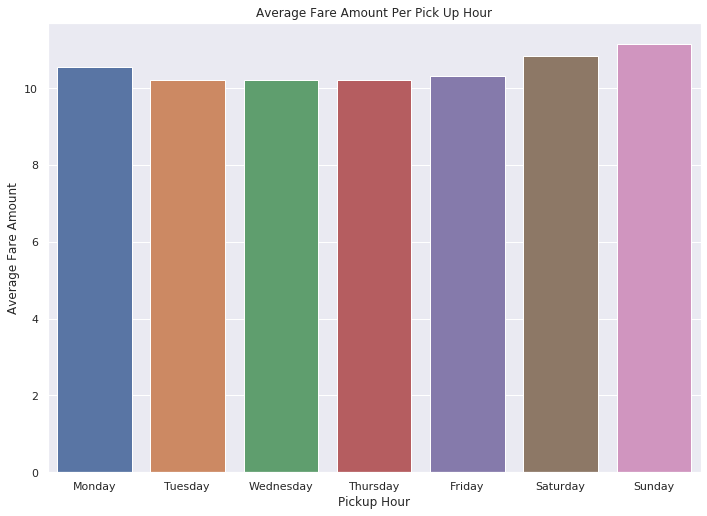

In [65]:
ax_fare_amount_puday = sns.barplot(x=PUDay_df_fil.index, y="fare_amount", data=PUDay_df_fil);
ax_fare_amount_puday.set_title("Average Fare Amount Per Pick Up Hour");
ax_fare_amount_puday.set_xlabel("Pickup Hour");
ax_fare_amount_puday.set_ylabel("Average Fare Amount");

#### Average Total Amount Earned per Pick-Up Day (After Removing Outliers)

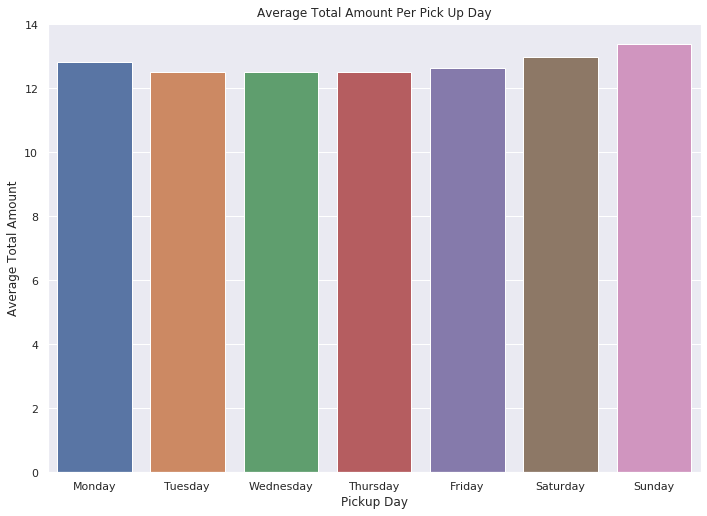

In [66]:
ax_total_amount_puday = sns.barplot(x=PUDay_df_fil.index, y="total_amount", data=PUDay_df_fil);
ax_total_amount_puday.set_title("Average Total Amount Per Pick Up Day");
ax_total_amount_puday.set_xlabel("Pickup Day");
ax_total_amount_puday.set_ylabel("Average Total Amount");

#### Average Trip Distance Traveled per Pick-Up Day (After Removing Outliers)

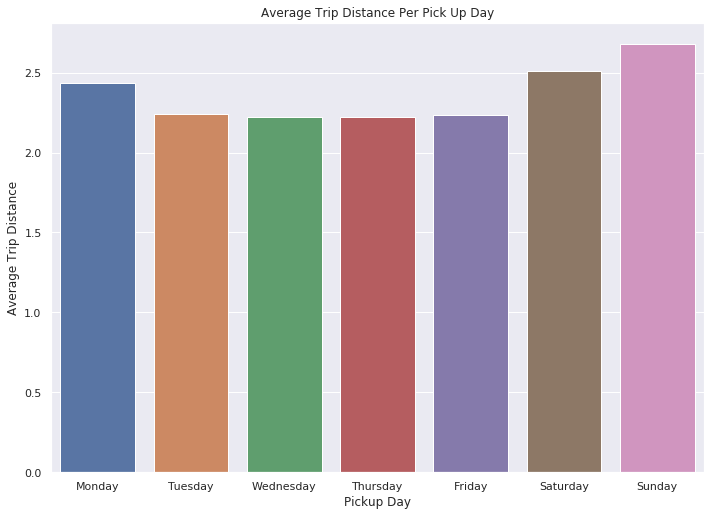

In [67]:
ax_trip_distance_puday = sns.barplot(x=PUDay_df_fil.index, y="trip_distance", data=PUDay_df_fil);
ax_trip_distance_puday.set_title("Average Trip Distance Per Pick Up Day");
ax_trip_distance_puday.set_xlabel("Pickup Day");
ax_trip_distance_puday.set_ylabel("Average Trip Distance");

#### Average Travel Time per Pick-Up Day (After Removing Outliers)

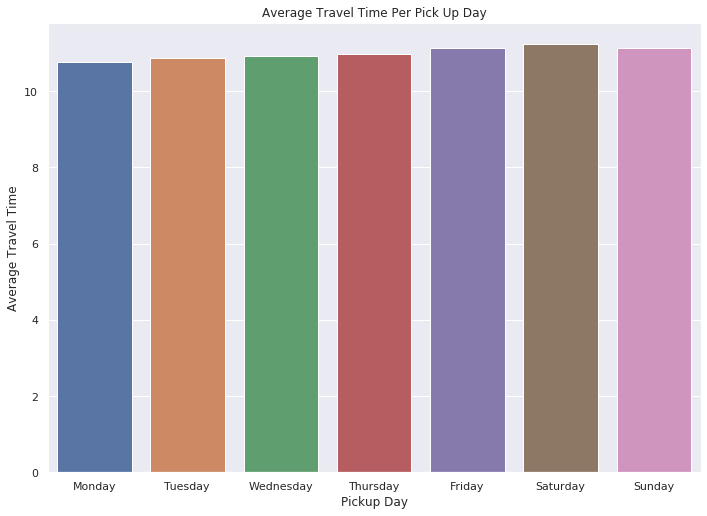

In [68]:
ax_travel_time_puday = sns.barplot(x=PUDay_df_fil.index, y="travel_time", data=PUDay_df_fil);
ax_travel_time_puday.set_title("Average Travel Time Per Pick Up Day");
ax_travel_time_puday.set_xlabel("Pickup Day");
ax_travel_time_puday.set_ylabel("Average Travel Time");

### Per Pick Up Hour

#### Average Fare Amount per Pick-Up Hour (After Removing Outliers)

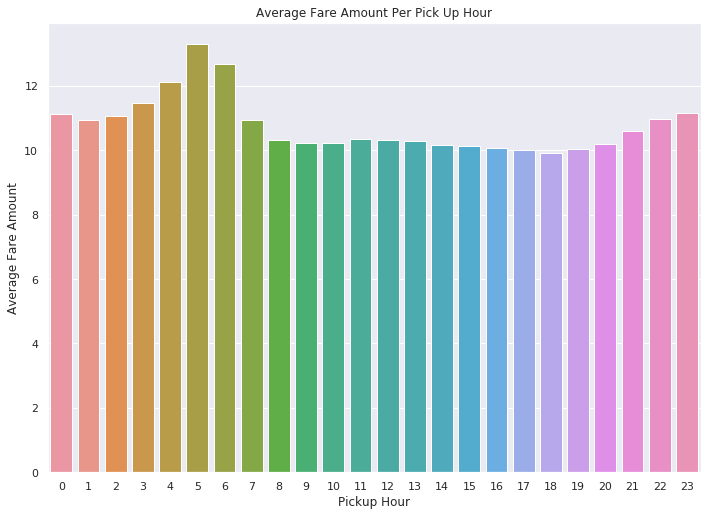

In [69]:
ax_fare_amount_pu = sns.barplot(x=PUHour_df_fil.index, y="fare_amount", data=PUHour_df_fil);
ax_fare_amount_pu.set_title("Average Fare Amount Per Pick Up Hour");
ax_fare_amount_pu.set_xlabel("Pickup Hour");
ax_fare_amount_pu.set_ylabel("Average Fare Amount");

#### Average Total Amount Earned per Pick-Up Hour (After Removing Outliers)

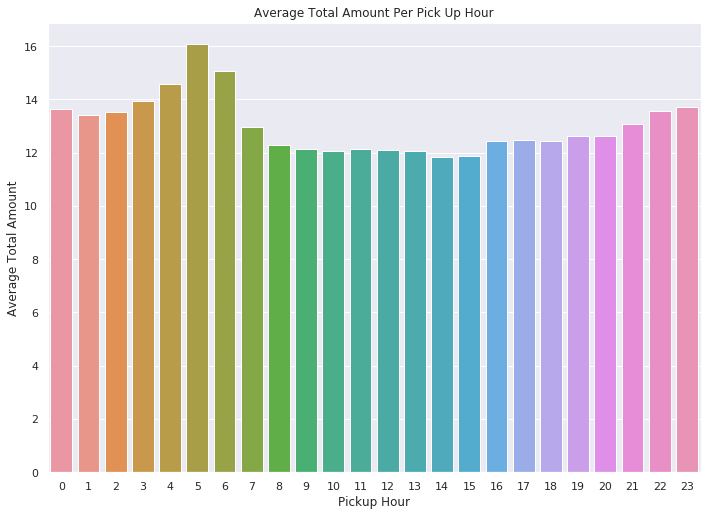

In [70]:
ax_total_amount_pu = sns.barplot(x=PUHour_df_fil.index, y="total_amount", data=PUHour_df_fil);
ax_total_amount_pu.set_title("Average Total Amount Per Pick Up Hour");
ax_total_amount_pu.set_xlabel("Pickup Hour");
ax_total_amount_pu.set_ylabel("Average Total Amount");

#### Average Trip Distance Traveled per Pick-Up Hour (After Removing Outliers)

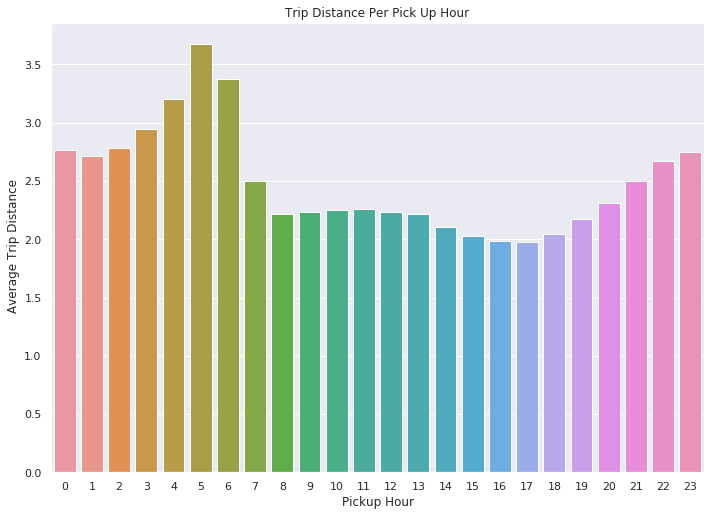

In [71]:
ax_trip_distance_pu = sns.barplot(x=PUHour_df_fil.index, y="trip_distance", data=PUHour_df_fil);
ax_trip_distance_pu.set_title("Trip Distance Per Pick Up Hour");
ax_trip_distance_pu.set_xlabel("Pickup Hour");
ax_trip_distance_pu.set_ylabel(" Average Trip Distance");

#### Average Travel Time per Pick-Up Hour (After Removing Outliers)

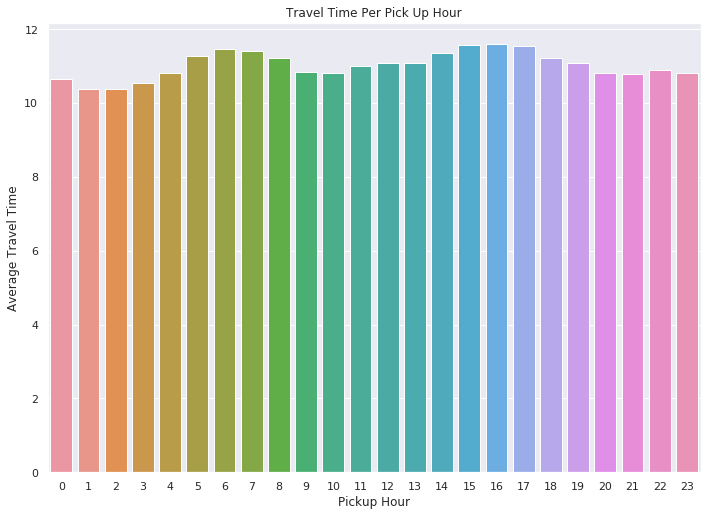

In [72]:
ax_travel_time_pu = sns.barplot(x=PUHour_df_fil.index, y="travel_time", data=PUHour_df_fil);
ax_travel_time_pu.set_title("Travel Time Per Pick Up Hour");
ax_travel_time_pu.set_xlabel("Pickup Hour");
ax_travel_time_pu.set_ylabel("Average Travel Time");

##### Does removing the extreme values really change the graphs siginificantly?

The obvious change is the scale of max of the y-axis for these plots. After removing outliers, the max value on the y-axis changes. Besides this, other changes are:

 - Average Fare Amount per Pick-Up Hour: The plot changes in many places, noticeably between hours ~8 and ~17. This suggests that many of the extreme points were between those ours. This suggests that the previous plot may have contained points that varied signigicantly throughout time.

 - Average Total Amount Earned per Pick-Up Hour: Similar results to the difference between the fare amount before and after removing extreme values. We can see a significant relative dip in the total amount earned between hours 15 and 20. 
 
 - Average Trip Distance Traveled per Pick-Up Hour: The plot doesn't change much after removing outliers, but there are some changes between 10 and 15.
 
 - Average Travel Time per Pick-Up Hour: The difference between before and after removing outliers is significant. The maximum value the plot reaches is much lower (between 11.4 and 11.5 as opposed to above 26 before removal of outliers). The shape of the plot is, therefore, changed due to the removal of the outliers. 

### Takeaway:

Removing outliers is important in this case. According to a former cab driver I spoke to (my own father), trips likes the one with massive total amounts we found in our dataset are very rare. They were rare in our dataset too, appearing in the top 1%. If we want to provide cab drivers any insight as to the best time to drive their cabs to maximize their net amounts earned, we need to remove outliers. 

##### From our plots now, we can see the best hour to drive is between the hours of 3 am to 7 am on Friday to Monday, particularly Sunday. 


Perhaps this is because many people go out on Saturday night and get home late on Sunday? We don't have information to make that conclusion, but a cab driver can look at these plots and possibly align them to their experiences.

## Model To Determine Which Trip will Lead to Best Total Amount Earned

I pose the problem: what kind of trip will lead the most total amount earned? 

To answer this question, we need to ask ourselves the following questions

 - What does a driver know at the start of a trip?
 - What does the driver not know at the start of a trip?
 
 
These questions are crucial to ask. For example, a driver doesn't know at the beginning of a trip how long a trip will take. Thus, we cannot make predictions on the total amount a driver will earn by using travel time. He also may not know the entire distance of the trip. It can be said that he can use his GPS to have an estimate of the distance between start point and destination. However, the driver doesn't know if he has to make any detours or if he will take the same route as other drivers to a destination. Thus, it is not best practice to make predictions with total distance traveled. 

What a driver does know at the start of a trip is how many passengers he has, the pick up location, the drop off location (since riders request destinations at the start of trips), the hour of pick up, the day of pick up, and from which borough to which borugh they will travel (assuming that the paths between boroughs stay between two boroughs or that all paths between two boroughs lie within a limited space of possibilities). We will, therefore, use these features. 

It should be noted that the total amount earned doesn't include tip. The reason why I am not including tip in the total amount is because a tip can be highly variable. A passenger may tip for a variety of reasons and the tip amount depends on many factors that aren't necessarily expressed in this dataset. 




### Preprocess Data for Essential Features

In [73]:
# We will use the our most recent, filtered dataset.
taxi_df_fil

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,PUBorough,DOBorough,borough_cross,PUHour,PUDay,DOHour,DODay
idx,,,,,,,,,,,,,,,,,,,,,,,,
0,2016-09-01 00:58:00,2016-09-01 01:11:00,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,0.3,14.80,1,1.0,13.0,Queens,Queens,Queens-Queens,0,3,1,3
1,2016-09-01 00:49:00,2016-09-01 01:05:00,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,0.3,15.80,2,1.0,16.0,Queens,Queens,Queens-Queens,0,3,1,3
2,2016-09-01 00:06:00,2016-09-01 00:15:00,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,0.3,16.30,2,1.0,9.0,Queens,Queens,Queens-Queens,0,3,0,3
4,2016-09-01 00:17:00,2016-09-01 00:27:00,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,0.3,15.96,1,1.0,10.0,Queens,Brooklyn,Queens-Brooklyn,0,3,0,3
5,2016-09-01 00:45:00,2016-09-01 01:00:00,1,244,20,1,4.53,16.0,0.5,0.5,0.00,0.0,0.3,17.30,1,1.0,15.0,Manhattan,Bronx,Manhattan-Bronx,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2016-09-28 11:09:00,2016-09-28 11:17:00,1,74,42,1,1.20,7.0,0.0,0.5,1.95,0.0,0.3,9.75,1,1.0,8.0,Manhattan,Manhattan,Manhattan-Manhattan,11,2,11,2
1048570,2016-09-28 11:07:00,2016-09-28 11:20:00,1,33,45,1,2.23,11.0,0.0,0.5,0.00,0.0,0.3,11.80,1,1.0,13.0,Brooklyn,Manhattan,Brooklyn-Manhattan,11,2,11,2
1048571,2016-09-28 11:38:00,2016-09-28 12:06:00,1,33,70,1,11.56,33.5,0.0,0.5,0.00,0.0,0.3,34.30,2,1.0,28.0,Brooklyn,Queens,Brooklyn-Queens,11,2,12,2


In [74]:
taxi_df_fil.describe(percentiles = [.25, .50, .75, .85, .95])

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,travel_time,PUHour,PUDay,DOHour,DODay
count,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000,930484.00000,930484.000000,930484.000000,930484.000000,930484.000000,930484.000000
mean,1.047401,114.349640,128.631426,1.342024,2.376391,10.530004,0.357536,0.494054,1.007875,0.070171,0.296358,12.792241,1.532337,1.01164,11.037196,13.493903,3.296667,13.462888,3.298153
std,0.429158,76.589618,77.592393,1.001940,2.032894,6.172672,0.366283,0.054202,1.739848,0.666468,0.032853,7.200331,0.515508,0.10726,6.400709,6.825410,1.973390,6.888019,1.976481
min,1.000000,1.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,49.000000,61.000000,1.000000,1.020000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000,1.000000,1.00000,6.000000,9.000000,2.000000,9.000000,2.000000
50%,1.000000,89.000000,127.000000,1.000000,1.720000,9.000000,0.500000,0.500000,0.000000,0.000000,0.300000,10.800000,2.000000,1.00000,10.000000,15.000000,4.000000,15.000000,4.000000
75%,1.000000,173.000000,193.000000,1.000000,3.030000,13.000000,0.500000,0.500000,1.860000,0.000000,0.300000,15.800000,2.000000,1.00000,15.000000,19.000000,5.000000,19.000000,5.000000
85%,1.000000,223.000000,231.000000,1.000000,4.030000,16.000000,1.000000,0.500000,2.500000,0.000000,0.300000,19.240000,2.000000,1.00000,18.000000,21.000000,6.000000,21.000000,6.000000
95%,1.000000,255.000000,255.000000,4.000000,6.500000,22.000000,1.000000,0.500000,4.000000,0.000000,0.300000,26.160000,2.000000,1.00000,24.000000,23.000000,6.000000,23.000000,6.000000
max,6.000000,265.000000,265.000000,9.000000,37.940000,450.000000,4.500000,0.500000,289.000000,150.000000,0.300000,450.000000,5.000000,2.00000,28.000000,23.000000,6.000000,23.000000,6.000000


In [75]:
# We need to map the Day of the week to actual days
day_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday',
                      6: 'Sunday'}

taxi_df_fil["PUDay"].replace(day_dict, inplace=True)
taxi_df_fil["DODay"].replace(day_dict, inplace=True)
# taxi_df_fil = taxi_df_fil.replace({'PUDay':day_dict}, {'DODay': day_dict})

/home/walidr/.local/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [76]:
# Take a look at the modified columns
taxi_df_fil[["PUDay", "DODay"]]

,PUDay,DODay
idx,,
0,Thursday,Thursday
1,Thursday,Thursday
2,Thursday,Thursday
4,Thursday,Thursday
5,Thursday,Thursday
...,...,...
1048569,Wednesday,Wednesday
1048570,Wednesday,Wednesday
1048571,Wednesday,Wednesday


In [77]:
# Let us specify the columns of interested. It is important to note that
# 'PUBorough', 'DOBorough' are captired in 'borough_cross'. I will first look 
# at feature importances before deciding to remove any of three features.
columns_wanted = ['PUBorough', 'DOBorough', 'borough_cross', 'PUHour', 'PUDay', 'passenger_count', 'total_amount']
fin_taxi = taxi_df_fil[columns_wanted]

In [78]:
fin_taxi.head()

,PUBorough,DOBorough,borough_cross,PUHour,PUDay,passenger_count,total_amount
idx,,,,,,,
0,Queens,Queens,Queens-Queens,0,Thursday,1,14.80
1,Queens,Queens,Queens-Queens,0,Thursday,2,15.80
2,Queens,Queens,Queens-Queens,0,Thursday,1,16.30
4,Queens,Brooklyn,Queens-Brooklyn,0,Thursday,1,15.96
5,Manhattan,Bronx,Manhattan-Bronx,0,Thursday,1,17.30


In [79]:
# We need to one-hot encode categorical variables (borugh_cross, PUBorough, DOBorough, PUHour, PUDay)

fin_taxi['PUBorough'] = pd.Categorical(fin_taxi['PUBorough'])
PUBorough_enc = pd.get_dummies(fin_taxi['PUBorough'], prefix = 'PUBorough')
fin_taxi  = pd.concat([fin_taxi, PUBorough_enc], axis=1)

fin_taxi['DOBorough'] = pd.Categorical(fin_taxi['DOBorough'])
DOBorough_enc = pd.get_dummies(fin_taxi['DOBorough'], prefix = 'DOBorough')
fin_taxi  = pd.concat([fin_taxi, DOBorough_enc], axis=1)

fin_taxi['borough_cross'] = pd.Categorical(fin_taxi['borough_cross'])
borough_cross_enc = pd.get_dummies(fin_taxi['borough_cross'], prefix = 'borough_cross')
fin_taxi  = pd.concat([fin_taxi, borough_cross_enc], axis=1)

fin_taxi['PUHour'] = pd.Categorical(fin_taxi['PUHour'])
PUHour_enc = pd.get_dummies(fin_taxi['PUHour'], prefix = 'PUHour')
fin_taxi  = pd.concat([fin_taxi, PUHour_enc], axis=1)

fin_taxi['PUDay'] = pd.Categorical(fin_taxi['PUDay'])
PUDay_enc = pd.get_dummies(fin_taxi['PUDay'], prefix = 'PUDay')
fin_taxi  = pd.concat([fin_taxi, PUDay_enc], axis=1)


/home/walidr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
fin_taxi

,PUBorough,DOBorough,borough_cross,PUHour,PUDay,passenger_count,total_amount,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_EWR,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Staten Island,PUBorough_Unknown,DOBorough_Bronx,DOBorough_Brooklyn,DOBorough_EWR,DOBorough_Manhattan,DOBorough_Queens,DOBorough_Staten Island,DOBorough_Unknown,borough_cross_Bronx-Bronx,borough_cross_Bronx-Brooklyn,borough_cross_Bronx-Manhattan,borough_cross_Bronx-Queens,borough_cross_Bronx-Unknown,borough_cross_Brooklyn-Bronx,borough_cross_Brooklyn-Brooklyn,borough_cross_Brooklyn-EWR,borough_cross_Brooklyn-Manhattan,borough_cross_Brooklyn-Queens,borough_cross_Brooklyn-Staten Island,borough_cross_Brooklyn-Unknown,borough_cross_EWR-EWR,borough_cross_Manhattan-Bronx,borough_cross_Manhattan-Brooklyn,borough_cross_Manhattan-EWR,borough_cross_Manhattan-Manhattan,borough_cross_Manhattan-Queens,borough_cross_Manhattan-Unknown,borough_cross_Queens-Bronx,borough_cross_Queens-Brooklyn,borough_cross_Queens-Manhattan,borough_cross_Queens-Queens,borough_cross_Queens-Unknown,borough_cross_Staten Island-Brooklyn,borough_cross_Staten Island-EWR,borough_cross_Staten Island-Staten Island,borough_cross_Staten Island-Unknown,borough_cross_Unknown-Bronx,borough_cross_Unknown-Brooklyn,borough_cross_Unknown-EWR,borough_cross_Unknown-Manhattan,borough_cross_Unknown-Queens,borough_cross_Unknown-Staten Island,borough_cross_Unknown-Unknown,PUHour_0,PUHour_1,PUHour_2,PUHour_3,PUHour_4,PUHour_5,PUHour_6,PUHour_7,PUHour_8,PUHour_9,PUHour_10,PUHour_11,PUHour_12,PUHour_13,PUHour_14,PUHour_15,PUHour_16,PUHour_17,PUHour_18,PUHour_19,PUHour_20,PUHour_21,PUHour_22,PUHour_23,PUDay_Friday,PUDay_Monday,PUDay_Saturday,PUDay_Sunday,PUDay_Thursday,PUDay_Tuesday,PUDay_Wednesday
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Queens,Queens,Queens-Queens,0,Thursday,1,14.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Queens,Queens,Queens-Queens,0,Thursday,2,15.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Queens,Queens,Queens-Queens,0,Thursday,1,16.30,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Queens,Brooklyn,Queens-Brooklyn,0,Thursday,1,15.96,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Manhattan,Bronx,Manhattan-Bronx,0,Thursday,1,17.30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,Manhattan,Manhattan,Manhattan-Manhattan,11,Wednesday,1,9.75,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1048570,Brooklyn,Manhattan,Brooklyn-Manhattan,11,Wednesday,1,11.80,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1048571,Brooklyn,Queens,Brooklyn-Queens,11,Wednesday,1,34.30,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
# Now that we have one-hot encoded nominal values, or values that should really be given equal weight,
# we can drop the original non one-hot-encoded columns of that were one-hot-encoded

drop_columns = ['PUBorough', 'DOBorough', 'borough_cross', 'PUHour', 'PUDay']
fin_taxi = fin_taxi.drop(drop_columns, axis=1)
fin_taxi.head()

,passenger_count,total_amount,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_EWR,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Staten Island,PUBorough_Unknown,DOBorough_Bronx,DOBorough_Brooklyn,DOBorough_EWR,DOBorough_Manhattan,DOBorough_Queens,DOBorough_Staten Island,DOBorough_Unknown,borough_cross_Bronx-Bronx,borough_cross_Bronx-Brooklyn,borough_cross_Bronx-Manhattan,borough_cross_Bronx-Queens,borough_cross_Bronx-Unknown,borough_cross_Brooklyn-Bronx,borough_cross_Brooklyn-Brooklyn,borough_cross_Brooklyn-EWR,borough_cross_Brooklyn-Manhattan,borough_cross_Brooklyn-Queens,borough_cross_Brooklyn-Staten Island,borough_cross_Brooklyn-Unknown,borough_cross_EWR-EWR,borough_cross_Manhattan-Bronx,borough_cross_Manhattan-Brooklyn,borough_cross_Manhattan-EWR,borough_cross_Manhattan-Manhattan,borough_cross_Manhattan-Queens,borough_cross_Manhattan-Unknown,borough_cross_Queens-Bronx,borough_cross_Queens-Brooklyn,borough_cross_Queens-Manhattan,borough_cross_Queens-Queens,borough_cross_Queens-Unknown,borough_cross_Staten Island-Brooklyn,borough_cross_Staten Island-EWR,borough_cross_Staten Island-Staten Island,borough_cross_Staten Island-Unknown,borough_cross_Unknown-Bronx,borough_cross_Unknown-Brooklyn,borough_cross_Unknown-EWR,borough_cross_Unknown-Manhattan,borough_cross_Unknown-Queens,borough_cross_Unknown-Staten Island,borough_cross_Unknown-Unknown,PUHour_0,PUHour_1,PUHour_2,PUHour_3,PUHour_4,PUHour_5,PUHour_6,PUHour_7,PUHour_8,PUHour_9,PUHour_10,PUHour_11,PUHour_12,PUHour_13,PUHour_14,PUHour_15,PUHour_16,PUHour_17,PUHour_18,PUHour_19,PUHour_20,PUHour_21,PUHour_22,PUHour_23,PUDay_Friday,PUDay_Monday,PUDay_Saturday,PUDay_Sunday,PUDay_Thursday,PUDay_Tuesday,PUDay_Wednesday
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,14.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,15.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,16.30,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,15.96,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,17.30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Machine Learning

In [91]:
# Specify features and target
X = fin_taxi.drop(['total_amount'], axis = 1)
y = fin_taxi['total_amount'].values

In [92]:
# Scale the features
scaler = StandardScaler() #scale with mean 0 and standard deviation 1
X_scl = scaler.fit_transform(X)

In [93]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=.30, random_state=42)

#### XGBoost

XGBoost enables us to determine feature importances (like many other tree based models). This can help us pick out important features from our data and understand what is most important when predicting a total amount.

In [100]:
#Here, we apply the gradient boosted model
# for xgboost python API, we will need to first create a data class named `xgboost.DMatrix`
data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
xgb_params = {
    "eta": 0.1,
    "subsample": 0.5,
    "colsample_bytree": 0.75,
    "max_depth": 5,
    "objective": "reg:squarederror", 
    "eval_metric": "rmse",
    "early_stopping_rounds": 10,
    "seed": 4060
}

#Let's train our data set
xgbmodel = xgb.train(params=xgb_params, dtrain=data, num_boost_round=200)
cv_history = xgb.cv(params=xgb_params, dtrain=data, num_boost_round=200, nfold=3,
                    callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                               xgb.callback.early_stop(200)])

[0]	train-rmse:13.1298	test-rmse:13.1296
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:12.163	test-rmse:12.163
[2]	train-rmse:11.3097	test-rmse:11.3097
[3]	train-rmse:10.5724	test-rmse:10.5725
[4]	train-rmse:9.92947	test-rmse:9.92987
[5]	train-rmse:9.3651	test-rmse:9.3653
[6]	train-rmse:8.88698	test-rmse:8.88736
[7]	train-rmse:8.47883	test-rmse:8.48037
[8]	train-rmse:8.13107	test-rmse:8.13267
[9]	train-rmse:7.83829	test-rmse:7.83956
[10]	train-rmse:7.58967	test-rmse:7.59097
[11]	train-rmse:7.38001	test-rmse:7.38154
[12]	train-rmse:7.20458	test-rmse:7.20662
[13]	train-rmse:7.05544	test-rmse:7.0573
[14]	train-rmse:6.93011	test-rmse:6.93159
[15]	train-rmse:6.82658	test-rmse:6.82829
[16]	train-rmse:6.73753	test-rmse:6.73999
[17]	train-rmse:6.66119	test-rmse:6.66451
[18]	train-rmse:6.60019	test-rmse:6.60381
[19]	train-rmse:6.54656	test-rmse:6.55053
[20]	train-rmse:6.50604	test-rm

[192]	train-rmse:6.1951	test-rmse:6.23614
[193]	train-rmse:6.19489	test-rmse:6.23607
[194]	train-rmse:6.19476	test-rmse:6.23591
[195]	train-rmse:6.19463	test-rmse:6.23589
[196]	train-rmse:6.19443	test-rmse:6.23575
[197]	train-rmse:6.19421	test-rmse:6.23571
[198]	train-rmse:6.19398	test-rmse:6.23556
[199]	train-rmse:6.19383	test-rmse:6.23557


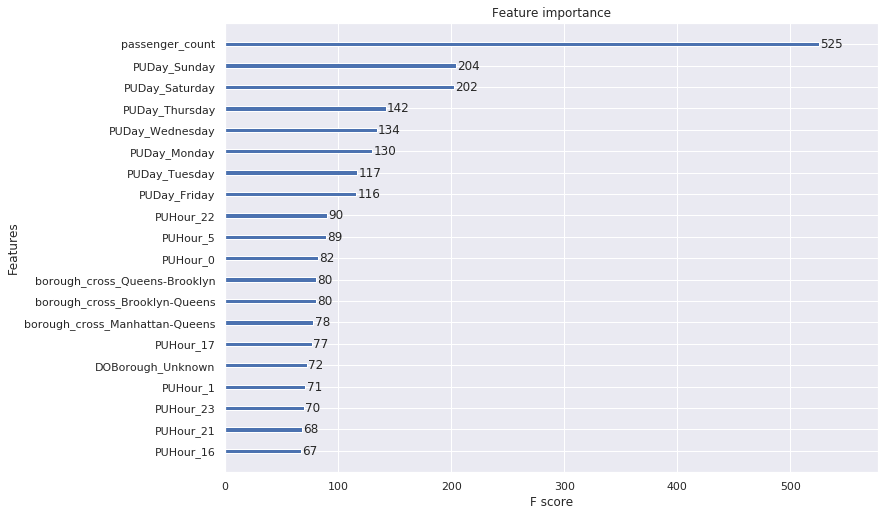

In [101]:
#We can plot the F score of our genes
xgb.plot_importance(xgbmodel, importance_type='weight', max_num_features=20);

From the feature importances plot above, we can see that the most important features. Passenger count matters the most, followed by the days of the week for pick up, followed by the hour of pick up. We also see that the borough_cross feature appears important, more so than the actual boroughs themselves. This only displays the top 20 features. We can use this to our advantage in the training of other models. 

In [104]:
#Let's do a prediction

#Need to do train test split due to scaling removing column names. Won't be able to run a test without doing
# this. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)


xgb_pred = xgbmodel.predict(xgb.DMatrix(X_test))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_scores = pd.DataFrame({'R2 Score': xgb_r2, 'MAE':xgb_mae, 'MSE':xgb_mse}, index=[0])
xgb_scores

,R2 Score,MAE,MSE
0,0.067187,4.873455,48.461547


These results are quite poor. Thus, our XGBoost model is a poor model for our data. Regardless, we can use the feature importances and subset our dataset to use fewer features. 

In [85]:
# Let's look at all our features again.
print(X.columns)

Index(['passenger_count', 'PUBorough_Bronx', 'PUBorough_Brooklyn', 'PUBorough_EWR', 'PUBorough_Manhattan', 'PUBorough_Queens', 'PUBorough_Staten Island', 'PUBorough_Unknown', 'DOBorough_Bronx', 'DOBorough_Brooklyn', 'DOBorough_EWR', 'DOBorough_Manhattan', 'DOBorough_Queens', 'DOBorough_Staten Island', 'DOBorough_Unknown', 'borough_cross_Bronx-Bronx', 'borough_cross_Bronx-Brooklyn', 'borough_cross_Bronx-Manhattan', 'borough_cross_Bronx-Queens', 'borough_cross_Bronx-Unknown', 'borough_cross_Brooklyn-Bronx', 'borough_cross_Brooklyn-Brooklyn', 'borough_cross_Brooklyn-EWR', 'borough_cross_Brooklyn-Manhattan', 'borough_cross_Brooklyn-Queens', 'borough_cross_Brooklyn-Staten Island', 'borough_cross_Brooklyn-Unknown', 'borough_cross_EWR-EWR', 'borough_cross_Manhattan-Bronx', 'borough_cross_Manhattan-Brooklyn', 'borough_cross_Manhattan-EWR', 'borough_cross_Manhattan-Manhattan', 'borough_cross_Manhattan-Queens', 'borough_cross_Manhattan-Unknown', 'borough_cross_Queens-Bronx',
       'borough_cros

In [94]:
keep_features = [
    'passenger_count', 'PUHour_0', 'PUHour_1', 'PUHour_2', 'PUHour_3', 'PUHour_4', 'PUHour_5', 
    'PUHour_6', 'PUHour_7', 'PUHour_8', 'PUHour_9', 'PUHour_10', 'PUHour_11', 'PUHour_12', 'PUHour_13',
    'PUHour_14', 'PUHour_15', 'PUHour_16', 'PUHour_17', 'PUHour_18', 'PUHour_19', 'PUHour_20', 'PUHour_21', 
    'PUHour_22', 'PUHour_23', 'PUDay_Friday', 'PUDay_Monday', 'PUDay_Saturday', 'PUDay_Sunday', 
    'PUDay_Thursday', 'PUDay_Tuesday', 'PUDay_Wednesday', 'borough_cross_Brooklyn-Queens', 'borough_cross_Queens-Brooklyn',
    'borough_cross_Manhattan-Queens'
]

X = X[keep_features]
# Scale the features
scaler = StandardScaler() #scale with mean 0 and standard deviation 1
X_scl = scaler.fit_transform(X)

# y is the same as before

In [95]:
# This function accepts the features (X), the labels (y), the test size for 
# train/test split, and a random_state if you choose to supply it.

def preliminary_testing(X, y, test_size, random_state=0):
    # Train test split with stratification of labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize lists to hold models and metrics
    premodels = []
    model_names = []
    r2_scores = []
    mean_abs_errs = []
    mean_sqr_errs = []
    
    # Initialize and add models to premodels list
    premodels.append(('OLS', linear_model.LinearRegression()))
    premodels.append(('Ridge Reg', linear_model.Ridge(alpha=.5)))
    premodels.append(('Lasso Reg', linear_model.Lasso(alpha=0.1)))
#     premodels.append(('Elastic Net', linear_model.ElasticNet()))
#     premodels.append(('KNN', KNeighborsRegressor()))
    
    # Iteratively call each model and append metrics to corresponding lists
    for name, premodel in premodels:
        premodel.fit(X_train, y_train)
        y_pred = premodel.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
        mean_abs_errs.append(mean_absolute_error(y_test, y_pred))
        mean_sqr_errs.append(mean_squared_error(y_test, y_pred))
        print(f"Trained the {name} model")
        model_names.append(name)
        
    # Make dataframe of each model's performance and return it    
    preliminary_test = pd.DataFrame({'Model Name': model_names, 'R2 Score': r2_scores, 'MAE':mean_abs_errs, 'MSE':mean_sqr_errs})
    return preliminary_test

In [96]:
%timeit
preliminary_testing(X, y, .30, 42)

Trained the OLS model
Trained the Ridge Reg model
Trained the Lasso Reg model


,Model Name,R2 Score,MAE,MSE
0,OLS,0.093680,4.959237,47.085157
1,Ridge Reg,0.093680,4.959200,47.085167
2,Lasso Reg,0.016565,5.154837,51.091458


None of our models have performed well at all given the low R2 scores and high MAE and MSE. For the purpose of a first iteration, I have stopped here. I will improve each of the models and design some more models to improve the performance. I will also engineer some other features that may improve our performance. I also will attempt to design a neural network to determine total amount earned with the features at hand.